In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from jk import *
from utils import *
import matplotlib as mpl


NT=64

mpl.rcParams.update({'font.size': 14})

In [9]:
kappa="k0p1542"
print(np.array(get_data(kappa,5,NT)).shape)
kappa="k0p15446"
print(np.array(get_data(kappa,5,NT)).shape)

(580, 32)
(481, 32)


In [10]:
data = {}
for kappa in ["k0p1542", "k0p15446"]:
    data[kappa]={5: np.array(get_data(kappa,5,NT))}
    for i in range(3):
        data[kappa][i]=np.array(get_data(kappa,i+1,NT))

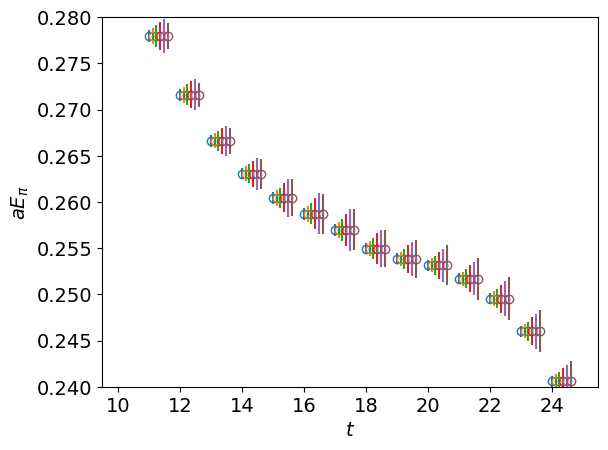

In [11]:
cut=100
kappa="k0p1542"
corr=data[kappa][5]
for i,b in enumerate([1,2,4,10,20,40]):
    d =jackKnife(log_eff_mass, corr[cut:,:], b)
    
    plt.errorbar([t+0.12*i for t in range(int(NT/2)-1)], d[0], d[1], linestyle="None", marker="o", markerfacecolor="None")
    plt.ylim(0.24,0.28)
    plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

Text(0, 0.5, '$aE$')

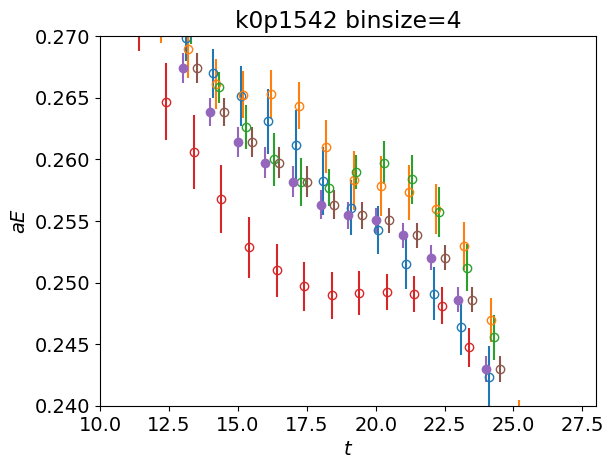

In [35]:
kappa="k0p1542" 

cfgsets = [[180,280],[280,380],[380,480],[480,580],[180,580]]

bin=4

for i,set in enumerate(cfgsets):
    nmean = lambda data : np.mean(data,axis=0)

    pidata=jackKnife(log_eff_mass, data[kappa][5][set[0]:set[1]], bin)

    if i==len(cfgsets)-1:
        plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o")
    plt.errorbar([t+(i+1)*0.1 for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")



plt.xlim(10,28)
plt.ylim(0.24,0.27)
plt.title(kappa+" binsize="+str(bin))
plt.xlabel(r'$t$')
plt.ylabel(r'$aE$')

## OLD

In [40]:
kappa="k0p1542"
corrPI=data[kappa][5]
corrRHO=data[kappa][0]+data[kappa][1]+data[kappa][2]
ts = np.array([t for t in range(int(NT/2))])

cut=120
bin=10

nmean = lambda data : np.mean(data,axis=0)

fitData=jackKnifeCov(nmean, corrPI[cut:,:], bin)
pibestFit, pibestFitTimes = get_best_cosh_fit(fitData, NT)
pibestFit2, pibestFit2Times = get_best_exp_fit(fitData, NT)

fitData=jackKnifeCov(nmean, corrRHO[cut:,:], bin)
rhobestFit, rhobestFitTimes = get_best_cosh_fit(fitData, NT)
rhobestFit2, rhobestFit2Times = get_best_exp_fit(fitData, NT)

pidata=jackKnife(log_eff_mass, corrPI[cut:,:], bin)
rhodata=jackKnife(log_eff_mass, corrRHO[cut:,:], bin)

paramsDict = lambda d : {key: d[key].mean for key in d}

pifitparams=paramsDict(pibestFit.p)
pifitFuncdata=[np.log(cosh_fit(t,pifitparams,NT)/cosh_fit(t+1,pifitparams,NT)) for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)]
pifit2params=paramsDict(pibestFit2.p)
pifit2Funcdata=[np.log(three_exp(t,pifit2params)/three_exp(t+1,pifit2params)) for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)]

rhofitparams=paramsDict(rhobestFit.p)
rhofitFuncdata=[np.log(cosh_fit(t,rhofitparams,NT)/cosh_fit(t+1,rhofitparams,NT)) for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)]
rhofit2params=paramsDict(rhobestFit2.p)
rhofit2Funcdata=[np.log(three_exp(t,rhofit2params)/three_exp(t+1,rhofit2params)) for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)]

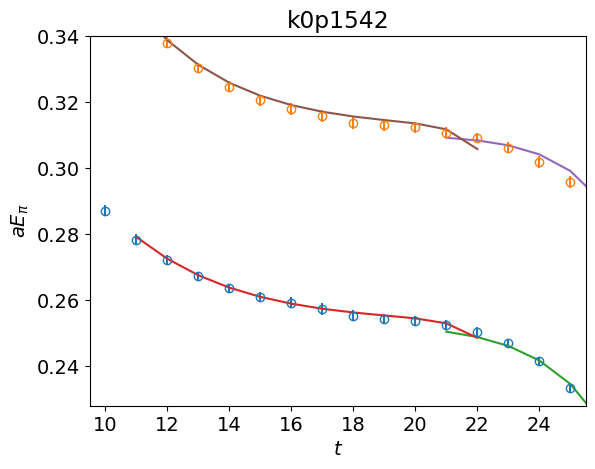

7.635479786958279 {'a': 0.0000655(17), 'E': 0.2530(11)}
7.295483390019112 {'a0': 3.4(1.0)e-17, 'E0': -1.08588548(63), 'a1': 0.1061(18), 'E1': 0.2532(10), 'a2': 0.35903(21), 'E2': 0.56980(70)}
8.325460026404087 {'a': 8.70(23)e-06, 'E': 0.3101(14)}
6.040417286462316 {'a0': 1.75(61)e-18, 'E0': -1.15859(0), 'a1': 0.0904322(0), 'E1': 0.312237(0), 'a2': 0.600329(0), 'E2': 0.664735(0)}


In [41]:
plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.errorbar([t for t in range(int(NT/2)-1)], rhodata[0], rhodata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)],pifitFuncdata)
plt.plot([t for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)],pifit2Funcdata)
plt.plot([t for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)],rhofitFuncdata)
plt.plot([t for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)],rhofit2Funcdata)
plt.title(kappa)
plt.ylim(0.228,0.34)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

for f in [pibestFit, pibestFit2, rhobestFit, rhobestFit2]:
    print(f.chi2, f.p)

In [44]:
print("Cosh mpi/mrho=", 0.2530/0.3101)
print("Exp mpi/mrho=",0.2532/0.3122)

Cosh mpi/mrho= 0.8158658497258949
Exp mpi/mrho= 0.8110185778347213


In [42]:
kappa="k0p15446"
corrPI=data[kappa][5][:-1]
corrRHO=data[kappa][0][:-1]+data[kappa][1][:-1]+data[kappa][2][:-1]
ts = np.array([t for t in range(int(NT/2))])

cut=120
bin=10

nmean = lambda data : np.mean(data,axis=0)

fitData=jackKnifeCov(nmean, corrPI[cut:,:], bin)
pibestFit, pibestFitTimes = get_best_cosh_fit(fitData, NT)
pibestFit2, pibestFit2Times = get_best_exp_fit(fitData, NT)

fitData=jackKnifeCov(nmean, corrRHO[cut:,:], bin)
rhobestFit, rhobestFitTimes = get_best_cosh_fit(fitData, NT)
rhobestFit2, rhobestFit2Times = get_best_exp_fit(fitData, NT)

pidata=jackKnife(log_eff_mass, corrPI[cut:,:], bin)
rhodata=jackKnife(log_eff_mass, corrRHO[cut:,:], bin)

paramsDict = lambda d : {key: d[key].mean for key in d}

pifitparams=paramsDict(pibestFit.p)
pifitFuncdata=[np.log(cosh_fit(t,pifitparams,NT)/cosh_fit(t+1,pifitparams,NT)) for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)]
pifit2params=paramsDict(pibestFit2.p)
pifit2Funcdata=[np.log(three_exp(t,pifit2params)/three_exp(t+1,pifit2params)) for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)]

rhofitparams=paramsDict(rhobestFit.p)
rhofitFuncdata=[np.log(cosh_fit(t,rhofitparams,NT)/cosh_fit(t+1,rhofitparams,NT)) for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)]
rhofit2params=paramsDict(rhobestFit2.p)
rhofit2Funcdata=[np.log(three_exp(t,rhofit2params)/three_exp(t+1,rhofit2params)) for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)]

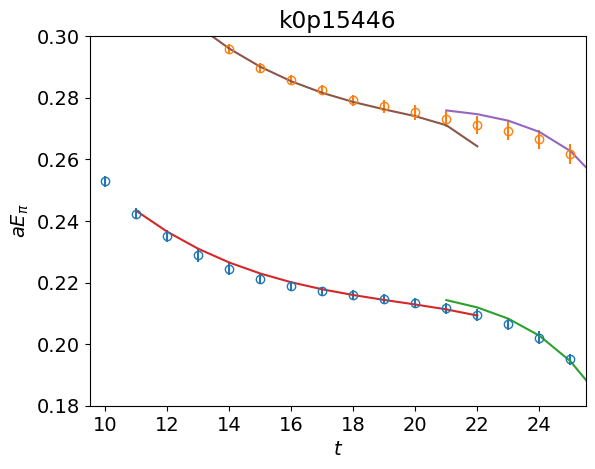

6.776119863544971 {'a': 0.0001690(51), 'E': 0.2187(11)}
3.8972611407334656 {'a0': 7(237)e-10, 'E0': -0.4(1.3), 'a1': 0.0767(95), 'E1': 0.2102(57), 'a2': 0.221(54), 'E2': 0.470(51)}
3.8823450847582164 {'a': 0.00001822(66), 'E': 0.2775(22)}
4.4989564532336255 {'a0': 3.9(1.7)e-17, 'E0': -1.0507625(53), 'a1': 0.0540(18), 'E1': 0.2685(18), 'a2': 0.2950(23), 'E2': 0.5352(35)}


In [46]:
plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.errorbar([t for t in range(int(NT/2)-1)], rhodata[0], rhodata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)],pifitFuncdata)
plt.plot([t for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)],pifit2Funcdata)
plt.plot([t for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)],rhofitFuncdata)
plt.plot([t for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)],rhofit2Funcdata)
plt.title(kappa)
plt.ylim(0.18,0.30)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

for f in [pibestFit, pibestFit2, rhobestFit, rhobestFit2]:
    print(f.chi2, f.p)

In [47]:
print("Cosh mpi/mrho=", 0.2187/0.2775)
print("Exp mpi/mrho=",0.2102/0.2685)

Cosh mpi/mrho= 0.788108108108108
Exp mpi/mrho= 0.7828677839851024
